# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading the dataset

In [2]:
df=pd.read_csv("C:\\datasets\\retail_dataset.csv",sep=",")

# first 10 rows

In [3]:
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


# last 10 rows

In [4]:
df.tail(10)

,0,1,2,3,4,5,6
305,Milk,Cheese,Wine,Meat,Bagel,Diaper,Bread
306,Bagel,Diaper,Milk,Cheese,Wine,NaN,NaN
307,Bread,Bagel,Milk,NaN,NaN,NaN,NaN
308,Diaper,NaN,NaN,NaN,NaN,NaN,NaN
309,Bagel,Pencil,Bread,Cheese,Eggs,NaN,NaN
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN
314,Eggs,Wine,Bagel,Bread,Meat,NaN,NaN


In [5]:
df.shape

(315, 7)

In [7]:
items=np.unique(df["0"])
print(items)

['Bagel' 'Bread' 'Cheese' 'Diaper' 'Eggs' 'Meat' 'Milk' 'Pencil' 'Wine']


# Visualization 

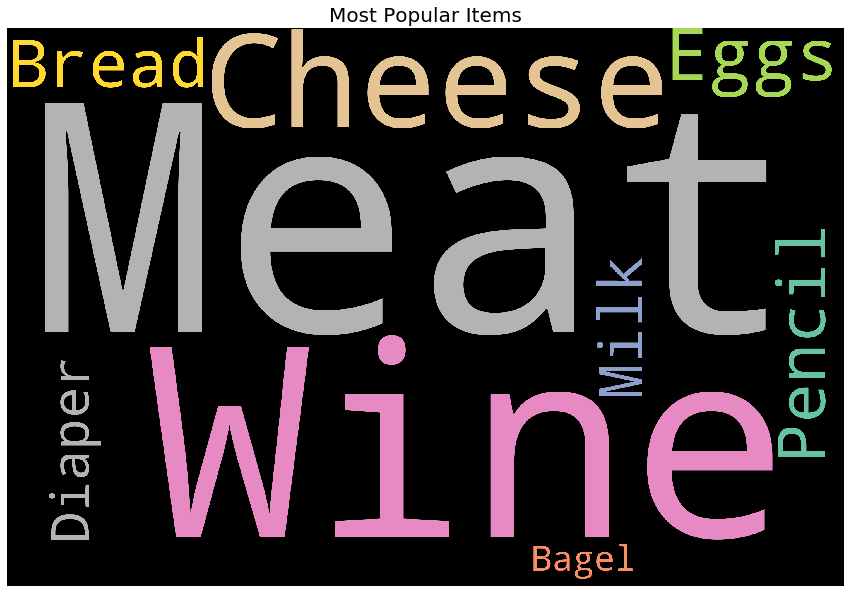

In [9]:
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
STOPWORDS.update(["nan","columns","rows"])

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'black', width = 3000,  height = 2000,colormap='Set2', max_words = 121).generate(str(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

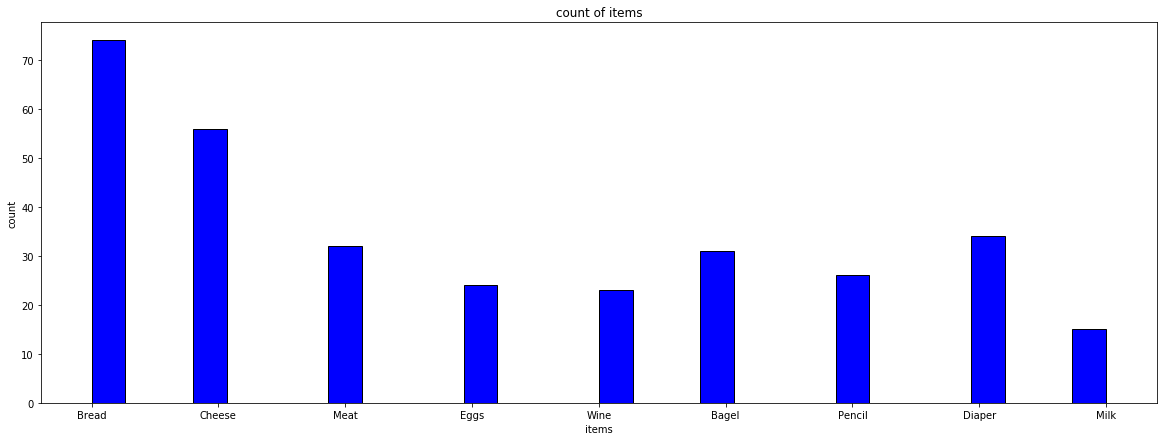

In [10]:
fig, ax = plt.subplots(figsize = (20,7))
plt.hist(df['0'], color = 'blue', edgecolor = 'black',bins=30,)
plt.title('count of items')
plt.xlabel('items')
plt.ylabel('count')
plt.show()

In [11]:
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,6)])

In [12]:
transactions

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan'],
 ['Meat', 'Pencil', 'Wine', 'nan', 'nan', 'nan'],
 ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper'],
 ['Wine', 'Pencil', 'Eggs', 'Cheese', 'nan', 'nan'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper', 'nan'],
 ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'],
 ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan'],
 ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine'],
 ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat', 'nan'],
 ['Bagel', 'Cheese', 'Milk', 'Meat', 'nan', 'nan'],
 ['Bread', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Pencil', 'Diaper', 'Bagel', 'nan', 'nan', 'nan'],
 ['Meat', 'Bagel', 'Bread', 'nan', 'nan', 'nan'],
 ['Bread', 'Bagel', 'Milk', 'nan', 'nan', 'nan'],
 ['Diaper', 'nan', 'nan', 'nan', 'nan', 'n

# Data preprocessing

In [13]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [14]:
ohe_df

,Bagel,Milk,Wine,Pencil,Cheese,Meat,Eggs,Bread,Diaper
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,0,1,1
2,0,1,1,0,1,1,1,0,0
3,0,1,1,0,1,1,1,0,0
4,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,1,0,1,1,0
311,0,1,0,1,0,1,0,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,0,0,1,1,0,0,0


# Apriori

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
freq_items = apriori(ohe_df, min_support=0.07, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Wine)
3,0.361905,(Pencil)
4,0.501587,(Cheese)
5,0.476190,(Meat)
6,0.438095,(Eggs)
7,0.504762,(Bread)


In [18]:
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,0.012023,1.060116
1,(Milk),(Bagel),0.501587,0.425397,0.225397,0.449367,1.056348,0.012023,1.043532
2,(Bagel),(Pencil),0.425397,0.361905,0.158730,0.373134,1.031029,0.004777,1.017914
3,(Pencil),(Bagel),0.361905,0.425397,0.158730,0.438596,1.031029,0.004777,1.023512
4,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
...,...,...,...,...,...,...,...,...,...
743,(Wine),"(Eggs, Cheese, Milk, Meat)",0.438095,0.152381,0.073016,0.166667,1.093750,0.006259,1.017143
744,(Cheese),"(Wine, Eggs, Milk, Meat)",0.501587,0.092063,0.073016,0.145570,1.581187,0.026838,1.062622
745,(Milk),"(Wine, Eggs, Cheese, Meat)",0.501587,0.111111,0.073016,0.145570,1.310127,0.017284,1.040329
746,(Meat),"(Wine, Eggs, Cheese, Milk)",0.476190,0.104762,0.073016,0.153333,1.463636,0.023129,1.057368


In [19]:
rank=rules[["antecedents","consequents","lift"]]
rank.sort_values("lift",ascending=False).head(10)

,antecedents,consequents,lift
524,"(Eggs, Cheese)","(Milk, Meat)",2.088975
529,"(Milk, Meat)","(Eggs, Cheese)",2.088975
739,"(Eggs, Cheese)","(Wine, Milk, Meat)",1.926862
726,"(Wine, Milk, Meat)","(Eggs, Cheese)",1.926862
528,"(Cheese, Meat)","(Eggs, Milk)",1.925134
525,"(Eggs, Milk)","(Cheese, Meat)",1.925134
574,"(Wine, Cheese)","(Eggs, Pencil)",1.924208
575,"(Eggs, Pencil)","(Wine, Cheese)",1.924208
697,"(Pencil, Cheese)","(Bread, Meat)",1.923077
696,"(Bread, Meat)","(Pencil, Cheese)",1.923077


In [20]:
rules = association_rules(freq_items, metric="lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Bagel, Milk)",(Bread),0.225397,0.504762,0.171429,0.760563,1.506777,0.057657,2.068347
1,"(Bread, Milk)",(Bagel),0.279365,0.425397,0.171429,0.613636,1.442503,0.052588,1.487208
2,(Bagel),"(Bread, Milk)",0.425397,0.279365,0.171429,0.402985,1.442503,0.052588,1.207063
3,(Bread),"(Bagel, Milk)",0.504762,0.225397,0.171429,0.339623,1.506777,0.057657,1.172971
4,"(Bagel, Wine)",(Diaper),0.171429,0.406349,0.101587,0.592593,1.458333,0.031927,1.457143
...,...,...,...,...,...,...,...,...,...
241,"(Eggs, Milk)","(Wine, Cheese, Meat)",0.244444,0.168254,0.073016,0.298701,1.775300,0.031887,1.186008
242,"(Eggs, Meat)","(Wine, Cheese, Milk)",0.266667,0.161905,0.073016,0.273810,1.691176,0.029841,1.154098
243,(Cheese),"(Wine, Eggs, Milk, Meat)",0.501587,0.092063,0.073016,0.145570,1.581187,0.026838,1.062622
244,(Meat),"(Wine, Eggs, Cheese, Milk)",0.476190,0.104762,0.073016,0.153333,1.463636,0.023129,1.057368


In [21]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(Bagel, Milk)",(Bread),0.225397,0.504762,0.171429,0.760563,1.506777,0.057657,2.068347,2
1,"(Bread, Milk)",(Bagel),0.279365,0.425397,0.171429,0.613636,1.442503,0.052588,1.487208,2
2,(Bagel),"(Bread, Milk)",0.425397,0.279365,0.171429,0.402985,1.442503,0.052588,1.207063,1
3,(Bread),"(Bagel, Milk)",0.504762,0.225397,0.171429,0.339623,1.506777,0.057657,1.172971,1
4,"(Bagel, Wine)",(Diaper),0.171429,0.406349,0.101587,0.592593,1.458333,0.031927,1.457143,2
...,...,...,...,...,...,...,...,...,...,...
241,"(Eggs, Milk)","(Wine, Cheese, Meat)",0.244444,0.168254,0.073016,0.298701,1.775300,0.031887,1.186008,2
242,"(Eggs, Meat)","(Wine, Cheese, Milk)",0.266667,0.161905,0.073016,0.273810,1.691176,0.029841,1.154098,2
243,(Cheese),"(Wine, Eggs, Milk, Meat)",0.501587,0.092063,0.073016,0.145570,1.581187,0.026838,1.062622,1
244,(Meat),"(Wine, Eggs, Cheese, Milk)",0.476190,0.104762,0.073016,0.153333,1.463636,0.023129,1.057368,1


In [22]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(Bagel, Milk)",(Bread),0.225397,0.504762,0.171429,0.760563,1.506777,0.057657,2.068347,2
11,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,2
14,"(Eggs, Milk)",(Cheese),0.244444,0.501587,0.196825,0.805195,1.605293,0.074215,2.558519,2
55,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,2
65,"(Wine, Pencil, Milk)",(Bread),0.095238,0.504762,0.073016,0.766667,1.518868,0.024943,2.122449,3
74,"(Wine, Milk, Meat)",(Cheese),0.126984,0.501587,0.101587,0.800000,1.594937,0.037894,2.492063,3
80,"(Wine, Eggs, Milk)",(Cheese),0.136508,0.501587,0.104762,0.767442,1.530026,0.036291,2.143175,3
112,"(Eggs, Cheese, Milk)",(Meat),0.196825,0.476190,0.152381,0.774194,1.625806,0.058655,2.319728,3
114,"(Eggs, Milk, Meat)",(Cheese),0.177778,0.501587,0.152381,0.857143,1.708861,0.063210,3.488889,3
115,"(Cheese, Milk, Meat)",(Eggs),0.203175,0.438095,0.152381,0.750000,1.711957,0.063371,2.247619,3


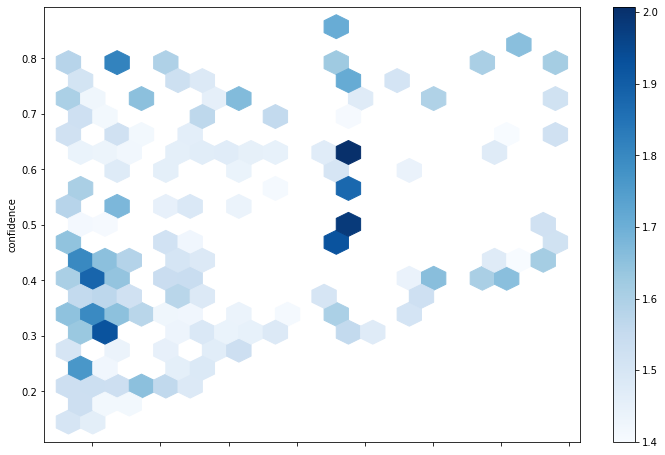

In [44]:
rules.plot(kind='hexbin',x='support',y='confidence', C='lift',gridsize=20,figsize=(12,8),cmap="Blues") 


# FpGrowth

In [19]:
freq_fp=fpgrowth(ohe_df, min_support=0.07, use_colnames=True)
freq_fp.head(7)

,support,itemsets
0,0.504762,(Bread)
1,0.501587,(Cheese)
2,0.476190,(Meat)
3,0.438095,(Eggs)
4,0.438095,(Wine)
5,0.406349,(Diaper)
6,0.361905,(Pencil)


In [26]:
rules_fp = association_rules(freq_fp, metric="lift", min_threshold=1.0)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
1,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
2,(Meat),(Milk),0.476190,0.501587,0.244444,0.513333,1.023418,0.005593,1.024136
3,(Milk),(Meat),0.501587,0.476190,0.244444,0.487342,1.023418,0.005593,1.021752
4,"(Bread, Meat)",(Cheese),0.206349,0.501587,0.142857,0.692308,1.380234,0.039355,1.619841
...,...,...,...,...,...,...,...,...,...
743,(Cheese),"(Meat, Bagel)",0.501587,0.190476,0.120635,0.240506,1.262658,0.025094,1.065873
744,"(Bread, Meat)",(Bagel),0.206349,0.425397,0.114286,0.553846,1.301952,0.026505,1.287904
745,"(Meat, Bagel)",(Bread),0.190476,0.504762,0.114286,0.600000,1.188679,0.018141,1.238095
746,(Bread),"(Meat, Bagel)",0.504762,0.190476,0.114286,0.226415,1.188679,0.018141,1.046458


In [27]:
rank_fp=rules_fp[["antecedents","consequents","lift"]]
rank_fp.sort_values("lift",ascending=False).head(10)

,antecedents,consequents,lift
77,"(Eggs, Cheese)","(Meat, Milk)",2.088975
76,"(Meat, Milk)","(Eggs, Cheese)",2.088975
284,"(Eggs, Cheese)","(Meat, Wine, Milk)",1.926862
265,"(Meat, Wine, Milk)","(Eggs, Cheese)",1.926862
75,"(Meat, Cheese)","(Eggs, Milk)",1.925134
78,"(Eggs, Milk)","(Meat, Cheese)",1.925134
622,"(Eggs, Pencil)","(Cheese, Wine)",1.924208
627,"(Cheese, Wine)","(Eggs, Pencil)",1.924208
381,"(Bread, Meat)","(Diaper, Cheese)",1.923077
536,"(Bread, Meat)","(Pencil, Cheese)",1.923077
